In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data
df = pd.read_csv('dataset.csv')  # replace with actual file name
df.head()


,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [3]:
# Basic info
df.info()

# Shape of data
print("Shape of dataset:", df.shape)

# Data types and missing values
print("\nMissing values:\n", df.isnull().sum())

# Unique values in each column
print("\nUnique values:\n", df.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [6]:
# Check Gender vs Cancer_Type
# Fix wrong values like "Prostate Cancer for Females" or "Cervical in Males"
pd.crosstab(df['Gender'], df['Cancer_Type'])


Cancer_Type,Breast,Cervical,Colon,Leukemia,Liver,Lung,Prostate,Skin
Gender,,,,,,,,
Female,2051,2160,2108,2081,2064,2067,0,2065
Male,2080,0,2147,2092,2091,2103,2138,2117
Other,2058,2034,2121,2093,2094,1989,2057,2049


In [7]:
# Remove logically inconsistent rows (e.g., Male with Cervical, Female with Prostate)
df = df[~((df['Gender'] == 'Male') & (df['Cancer_Type'] == 'Cervical'))]
df = df[~((df['Gender'] == 'Female') & (df['Cancer_Type'] == 'Prostate'))]


In [8]:
#Create Target Column: Has_Cancer

In [9]:
# Create a binary column: 1 if cancer type is known, else 0
df['Has_Cancer'] = df['Cancer_Type'].notna().astype(int)


In [12]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Has_Cancer
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,1
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,1
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,1
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,1
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,1


In [13]:
#Handle Categorical Variables

In [14]:
# Gender Encoding
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})

# Cancer_Stage Encoding (Ordinal)
stage_mapping = {
    'Stage 0': 0,
    'Stage I': 1,
    'Stage II': 2,
    'Stage III': 3,
    'Stage IV': 4
}
df['Cancer_Stage'] = df['Cancer_Stage'].map(stage_mapping)


In [15]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Has_Cancer
0,PT0000000,71,0,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,3,62913.44,5.9,4.92,1
1,PT0000001,34,0,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,0,12573.41,4.7,4.65,1
2,PT0000002,80,0,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,2,6984.33,7.1,5.84,1
3,PT0000003,40,0,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,1,67446.25,1.6,3.12,1
4,PT0000004,43,1,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,3,77977.12,2.9,3.62,1


In [16]:
# One-hot encode Country_Region
df = pd.get_dummies(df, columns=['Country_Region'], drop_first=True)


In [17]:
#EDA

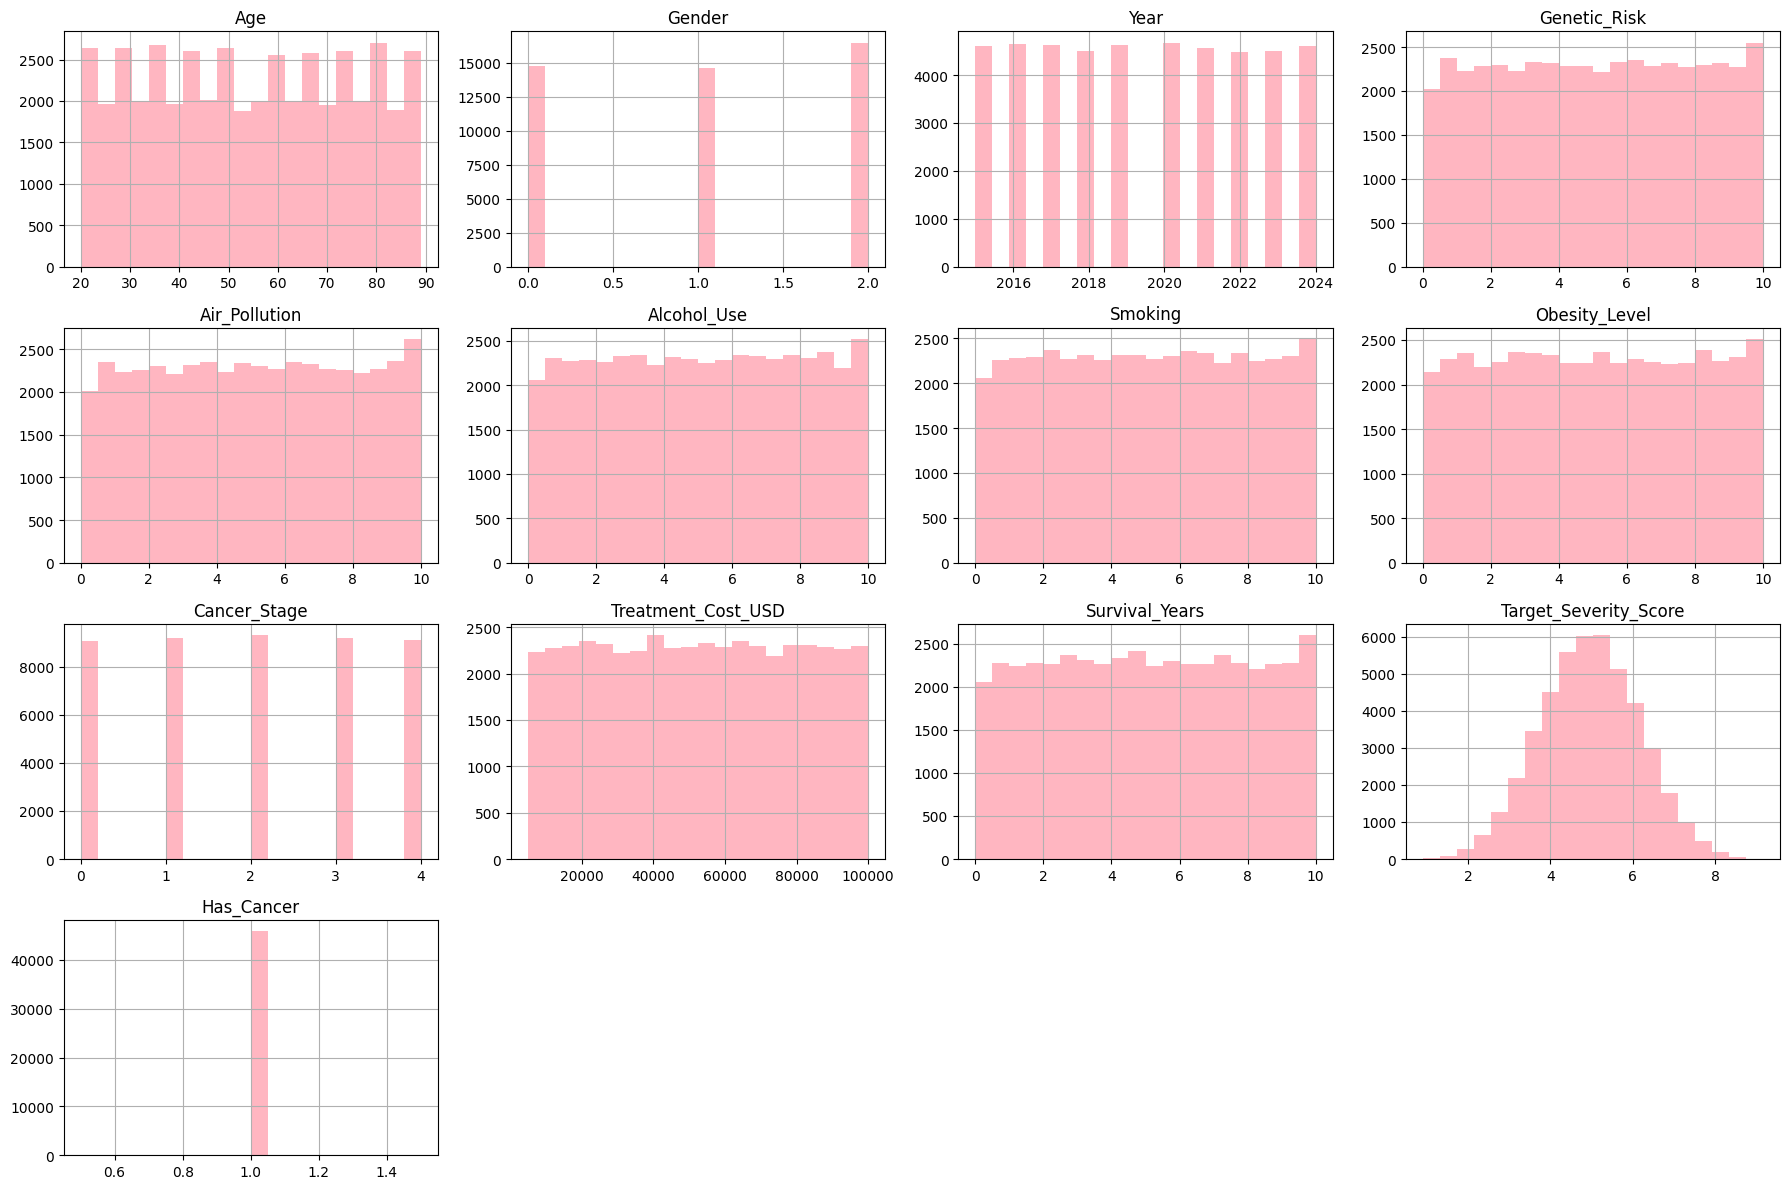

In [19]:
# Histogram of numeric features
df.hist(bins=20, figsize=(18, 12), color='lightpink')
plt.tight_layout()
plt.show()


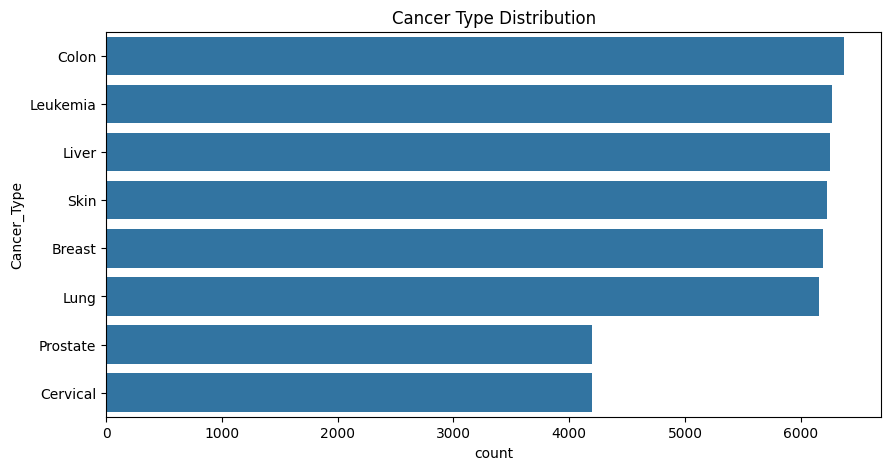

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Cancer_Type', data=df, order=df['Cancer_Type'].value_counts().index)
plt.title("Cancer Type Distribution")
plt.show()


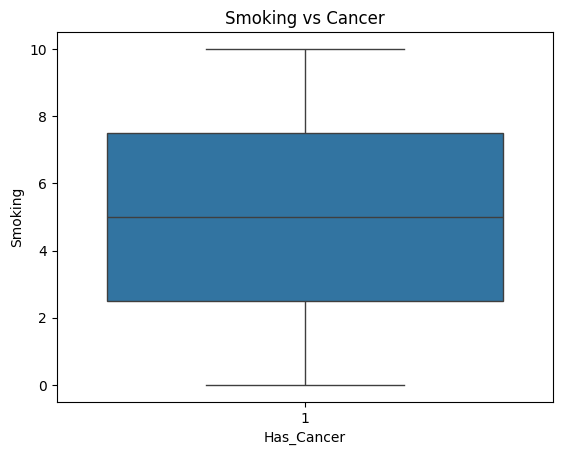

In [22]:
# Example: Smoking vs Has_Cancer
sns.boxplot(x='Has_Cancer', y='Smoking', data=df)
plt.title("Smoking vs Cancer")
plt.show()
